<a href="https://colab.research.google.com/github/hadilbelhadjhassin/gomycode/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve

# Loading dataset
df = pd.read_csv('TitanicDataSet.csv')



 



 
 

In [14]:
print("########## Feature engineering 1: SibSp & Parch ##########")
# Creating FamilySize column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df.head())


########## Feature engineering 1: SibSp & Parch ##########
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  
0      0         A/5 21171   7.2500   NaN        S           2  
1      0          PC 17599  71.2833   C85        C           2  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3

In [15]:
print("########## Feature engineering 2: Embarked ##########")
# Drop rows that has missing values on Embarked column
df = df.dropna(subset=['Embarked'])


########## Feature engineering 2: Embarked ##########


In [16]:
# Converting embarkation location into one-hot
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_one_hot], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


In [17]:
print("########## Feature engineering 3: Cabin ##########")
# Filling missing values in Cabin column with 'U' (Unknown)
df['Cabin'] = df['Cabin'].fillna('U')
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])


########## Feature engineering 3: Cabin ##########


In [18]:
# Converting cabin into one-hot
cabin_one_hot = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_one_hot], axis=1)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U'],
      dtype='object')


In [19]:
print("########## Feature engineering 4: Name ##########")

# Defining a function to extract title from Name column
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

df['Title'] = df['Name'].apply(get_title)

print(df['Title'].unique())
title_one_hot = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_one_hot], axis=1)

########## Feature engineering 4: Name ##########
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [20]:
print("########## Feature engineering 5: Sex ##########")
# Converting sex into one-hot
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_one_hot], axis=1)



########## Feature engineering 5: Sex ##########


In [21]:
print("########## Feature engineering 6: Age ##########")
# Take the age median of each title
age_median = df.groupby('Title')['Age'].median()
print(age_median)

def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age

df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)


########## Feature engineering 6: Age ##########
Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64


In [22]:
# Drop all columns containing categorical values
df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], axis=1)


In [23]:
# Normalizing values in the data frame
df = (df-df.min())/(df.max()-df.min())




In [24]:
# Defining target (y) & features(X)
y = df['Survived'].values
X = df.iloc[:,1:].values

In [25]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)


In [26]:
# Defining logistic regression model
clf = LogisticRegression()

# Training model
clf.fit(X_train, y_train)

# Finding out accuracy score
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))



0.8410689170182841
0.848314606741573


In [27]:
print("########## Model evaluation ##########")

# Predicting train data
train_preds = clf.predict(X_train)
cm = confusion_matrix(y_train, train_preds)


########## Model evaluation ##########


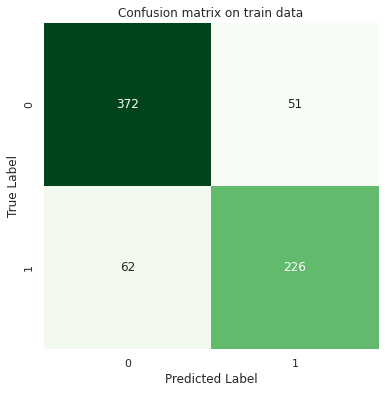

In [28]:
# Displaying confusion matrix on train data
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
# Predicting test data
test_preds = clf.predict(X_test)
cm = confusion_matrix(y_test, test_preds)


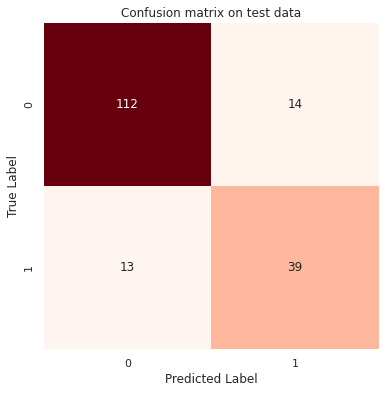

In [30]:
# Displaying confusion matrix on test data
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC Score: 0.87


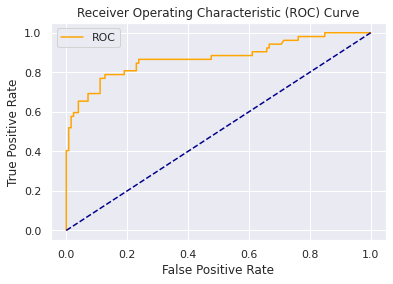

In [36]:
pred_prob = clf.predict_proba(X_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC Score: %.2f' % auc)


fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()